# Running Inference on Unseen Images using a Tensorflow Object Detection API Model

## Imports

In [1]:
import numpy as np
import os, sys
import tensorflow as tf

# object detection API
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# plotting
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Rectangle
matplotlib.use('Qt5Agg')
%matplotlib inline

## Functions

In [2]:
def _index_to_class_mapping():
    category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

    index_to_class = {}
    for key, value in category_index.items():
        index_to_class[key] = value["name"]
        
    return index_to_class

In [4]:
def make_prediction(path, predict_fn, index_to_class, index_to_color, p_threshold=0.7):
    """
    Run inference from a saved detection model.
    
    Parameters
    ----------
    
        path : str
            The path to theJPG image to run inference on.
            
        predict_fn : 
            The prediction function returned by tf.contrib.predictor.from_saved_model()
            
        index_to_class, index_to_color : dict
            Dictionaries mapping the class index into a class name and color; these will be displayed on the plot
            
        p_threshold : float
            The probabilitiy (in [0,1]) above which a detection box will be displayed on the plot
    
    
    Returns
    -------
    
        fig, ax : the matplotlib figure and axes
    
    """
    
    img = plt.imread(path)
    
    # generate the predictions from the object detector
    preds = predict_fn({"inputs": np.expand_dims(img, axis=0)})
    
    # plotting
    fig, ax  =plt.subplots(1,1,figsize=(10,10))
    
    ax.imshow(img)

    for p, coord, cls in zip(preds["detection_scores"][0,:],
                             preds["detection_boxes"][0,:], 
                             preds['detection_classes'][0]):
        # add each detected box to the plot
        # for Tensorflow API, coords are [ymin, xmin, ymax, xmax]

        if p > p_threshold:
            col = index_to_color[cls]
            ax.add_patch(Rectangle(xy=(coord[1]*img.shape[1], coord[0]*img.shape[0]),
                                   width=(coord[3]-coord[1])*img.shape[1], 
                                   height=(coord[2]-coord[0])*img.shape[0], 
                                   fill=None, color=col, lw=2))
            ax.text(coord[1]*img.shape[1], 0.95*coord[0]*img.shape[0], 
                    index_to_class[cls], color=col, fontsize=12 ,bbox=dict(facecolor="white", alpha=0.7, lw=0))
            
    ax.axis('off')
    return fig, ax

## Load the Inference Model

In [5]:
predict_fn = tf.contrib.predictor.from_saved_model(os.getcwd() + os.sep + "saved_model")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.


In [8]:
#
# Setup the plotting
#

# There is only one class in our example so this dictionary is pretty simple
index_to_color = {
 1: 'blue'
}

# Get the mapping from "id" to class name from the label file used to train the model
PATH_TO_LABELS = "./images/item_map.pbtxt"
index_to_class = _index_to_class_mapping()

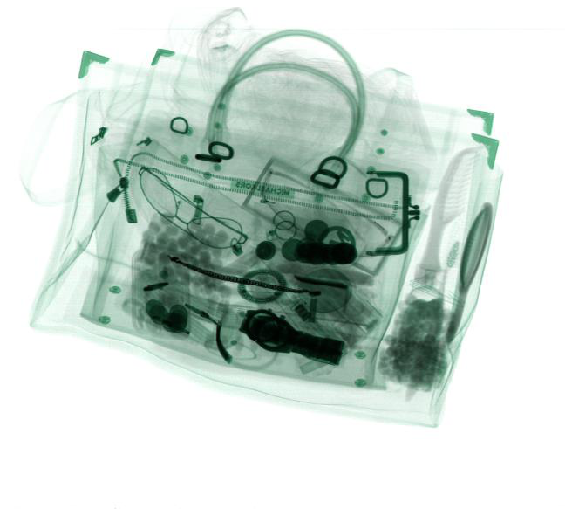

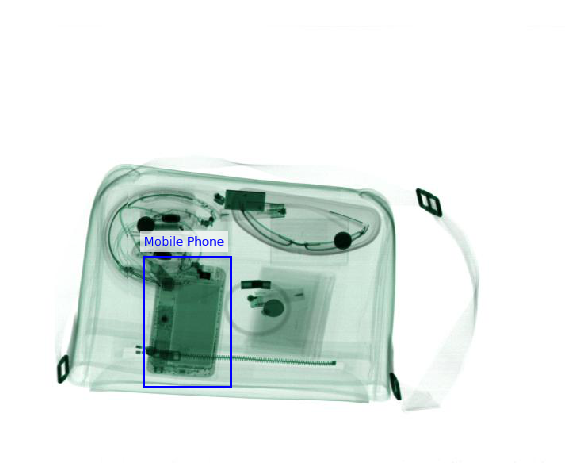

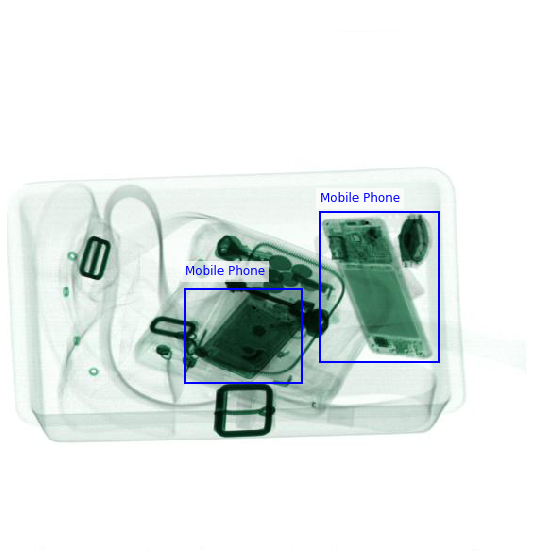

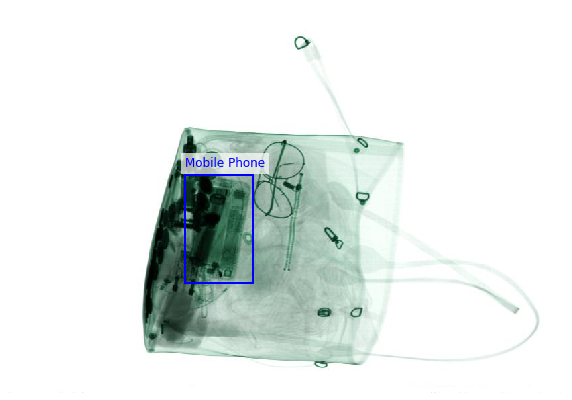

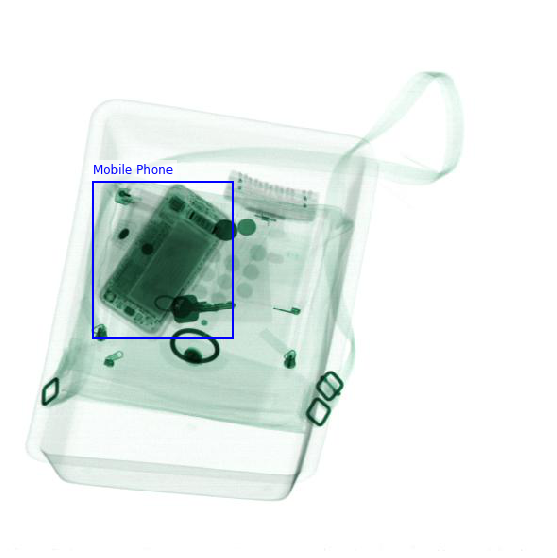

In [9]:
for i in range(5):
    fname = "image_{}.jpg".format(i)
    make_prediction(path="images"+ os.sep +fname, 
                    predict_fn = predict_fn,
                    index_to_class=index_to_class,
                    index_to_color=index_to_color,
                    p_threshold=0.7)
    plt.show()